In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import itertools
import collections
import warnings
warnings.filterwarnings("ignore")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Other Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import average_precision_score
from collections import Counter
from scipy.stats import norm
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE


# Keras Libraries for Neural Networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
import os
def main():
    # Define the file path for loading the dataset
    file_path = r"Downloads/creditcard.csv/creditcard.csv"  # Change this to your file path

    # Check if the file exists at the specified path
    if os.path.exists(file_path):
        print(f"Loading data from '{file_path}'...")
        try:
            df = pd.read_csv(file_path)
            print("File loaded successfully!")
            return df  
        except Exception as e:
            print(f"Error loading the file: {e}")
            return None
    else:
        print(f"Error: File not found at '{file_path}'.")
        print("Please check the file path and try again.")
        return None

if __name__ == "__main__":
    # Call main() and get the dataframe
    df = main()

   

Loading data from 'Downloads/creditcard.csv/creditcard.csv'...
File loaded successfully!


In [3]:
 # Check if df is loaded successfully
if df is not None:
        # Display basic information about the dataset
        print("Dataset shape:", df.shape)
        print("Dataset info:")
        print(df.describe())

        # Check for null values
        print("Null values count:", df.isnull().sum().max())

        # Display columns
        print("Columns:", df.columns)

        # Check class distribution
        print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
        print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')
else:
        print("Failed to load the dataset. Please fix the errors and try again.")

Dataset shape: (284807, 31)
Dataset info:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   


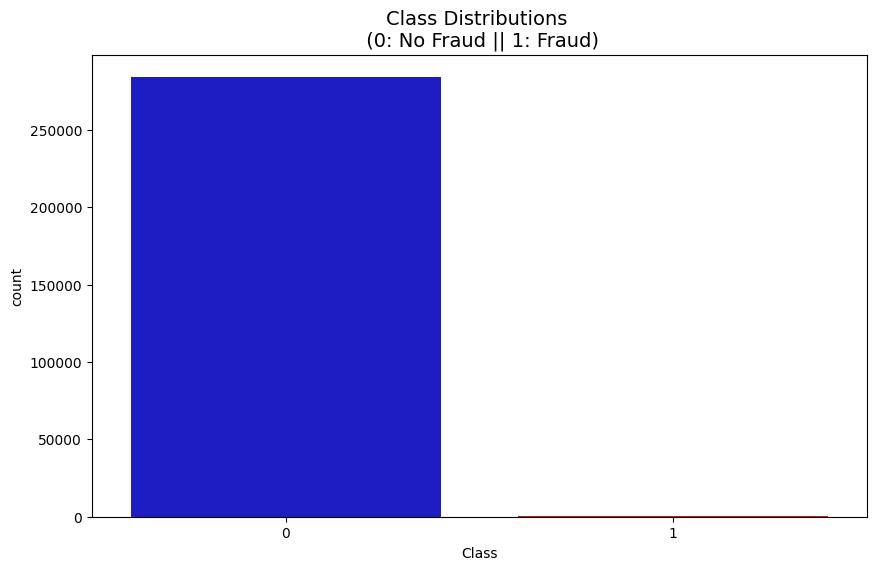

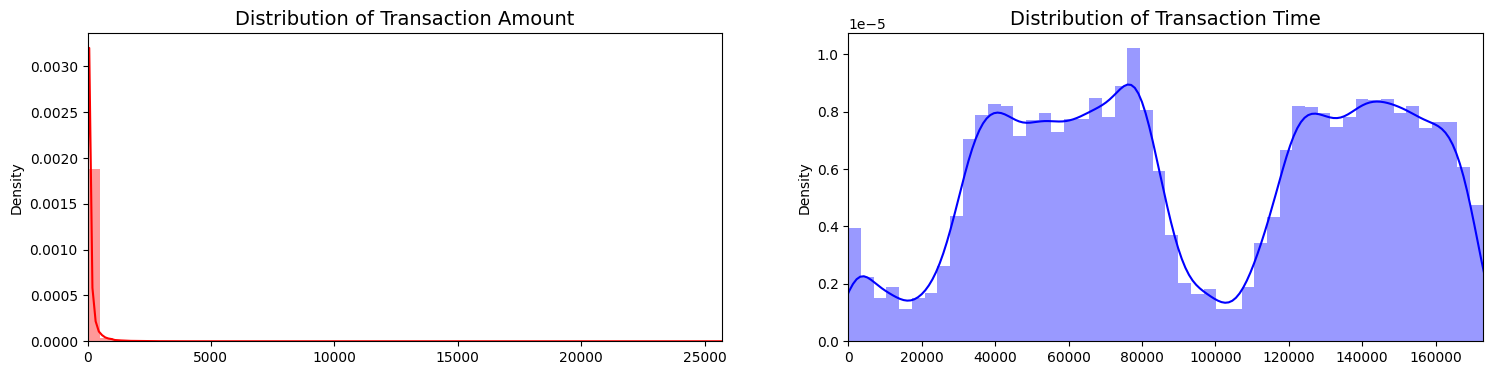

In [4]:
  # Plot class distribution
plt.figure(figsize=(10, 6))
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.savefig('class_distribution.png')

    # Plot Transaction Amount and Time distributions
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.savefig('distributions.png')

In [5]:
 # Scaling the Time and Amount features
print("Scaling features...")
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

# Reorganize columns
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Splitting the original dataset for testing purposes
print("Splitting original dataset...")
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", len(train_index), "Test:", len(test_index))
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    break  # We only need one split

Scaling features...
Splitting original dataset...
Train: 227845 Test: 56962


In [6]:
 # Convert to numpy arrays
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Check label distributions
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

# Random Under-Sampling implementation
print("Performing random under-sampling...")
# Shuffle the dataframe
df = df.sample(frac=1)

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827514 0.00172486]
[0.998262 0.001738]
Performing random under-sampling...


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


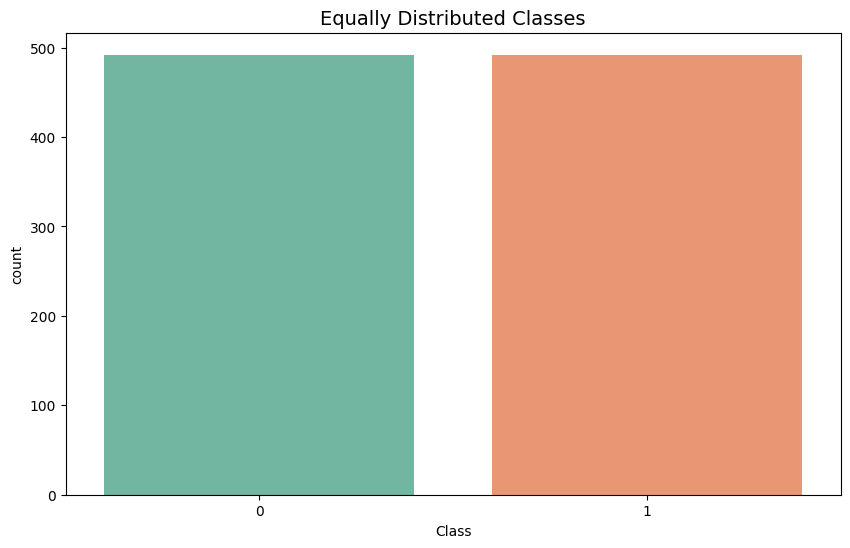

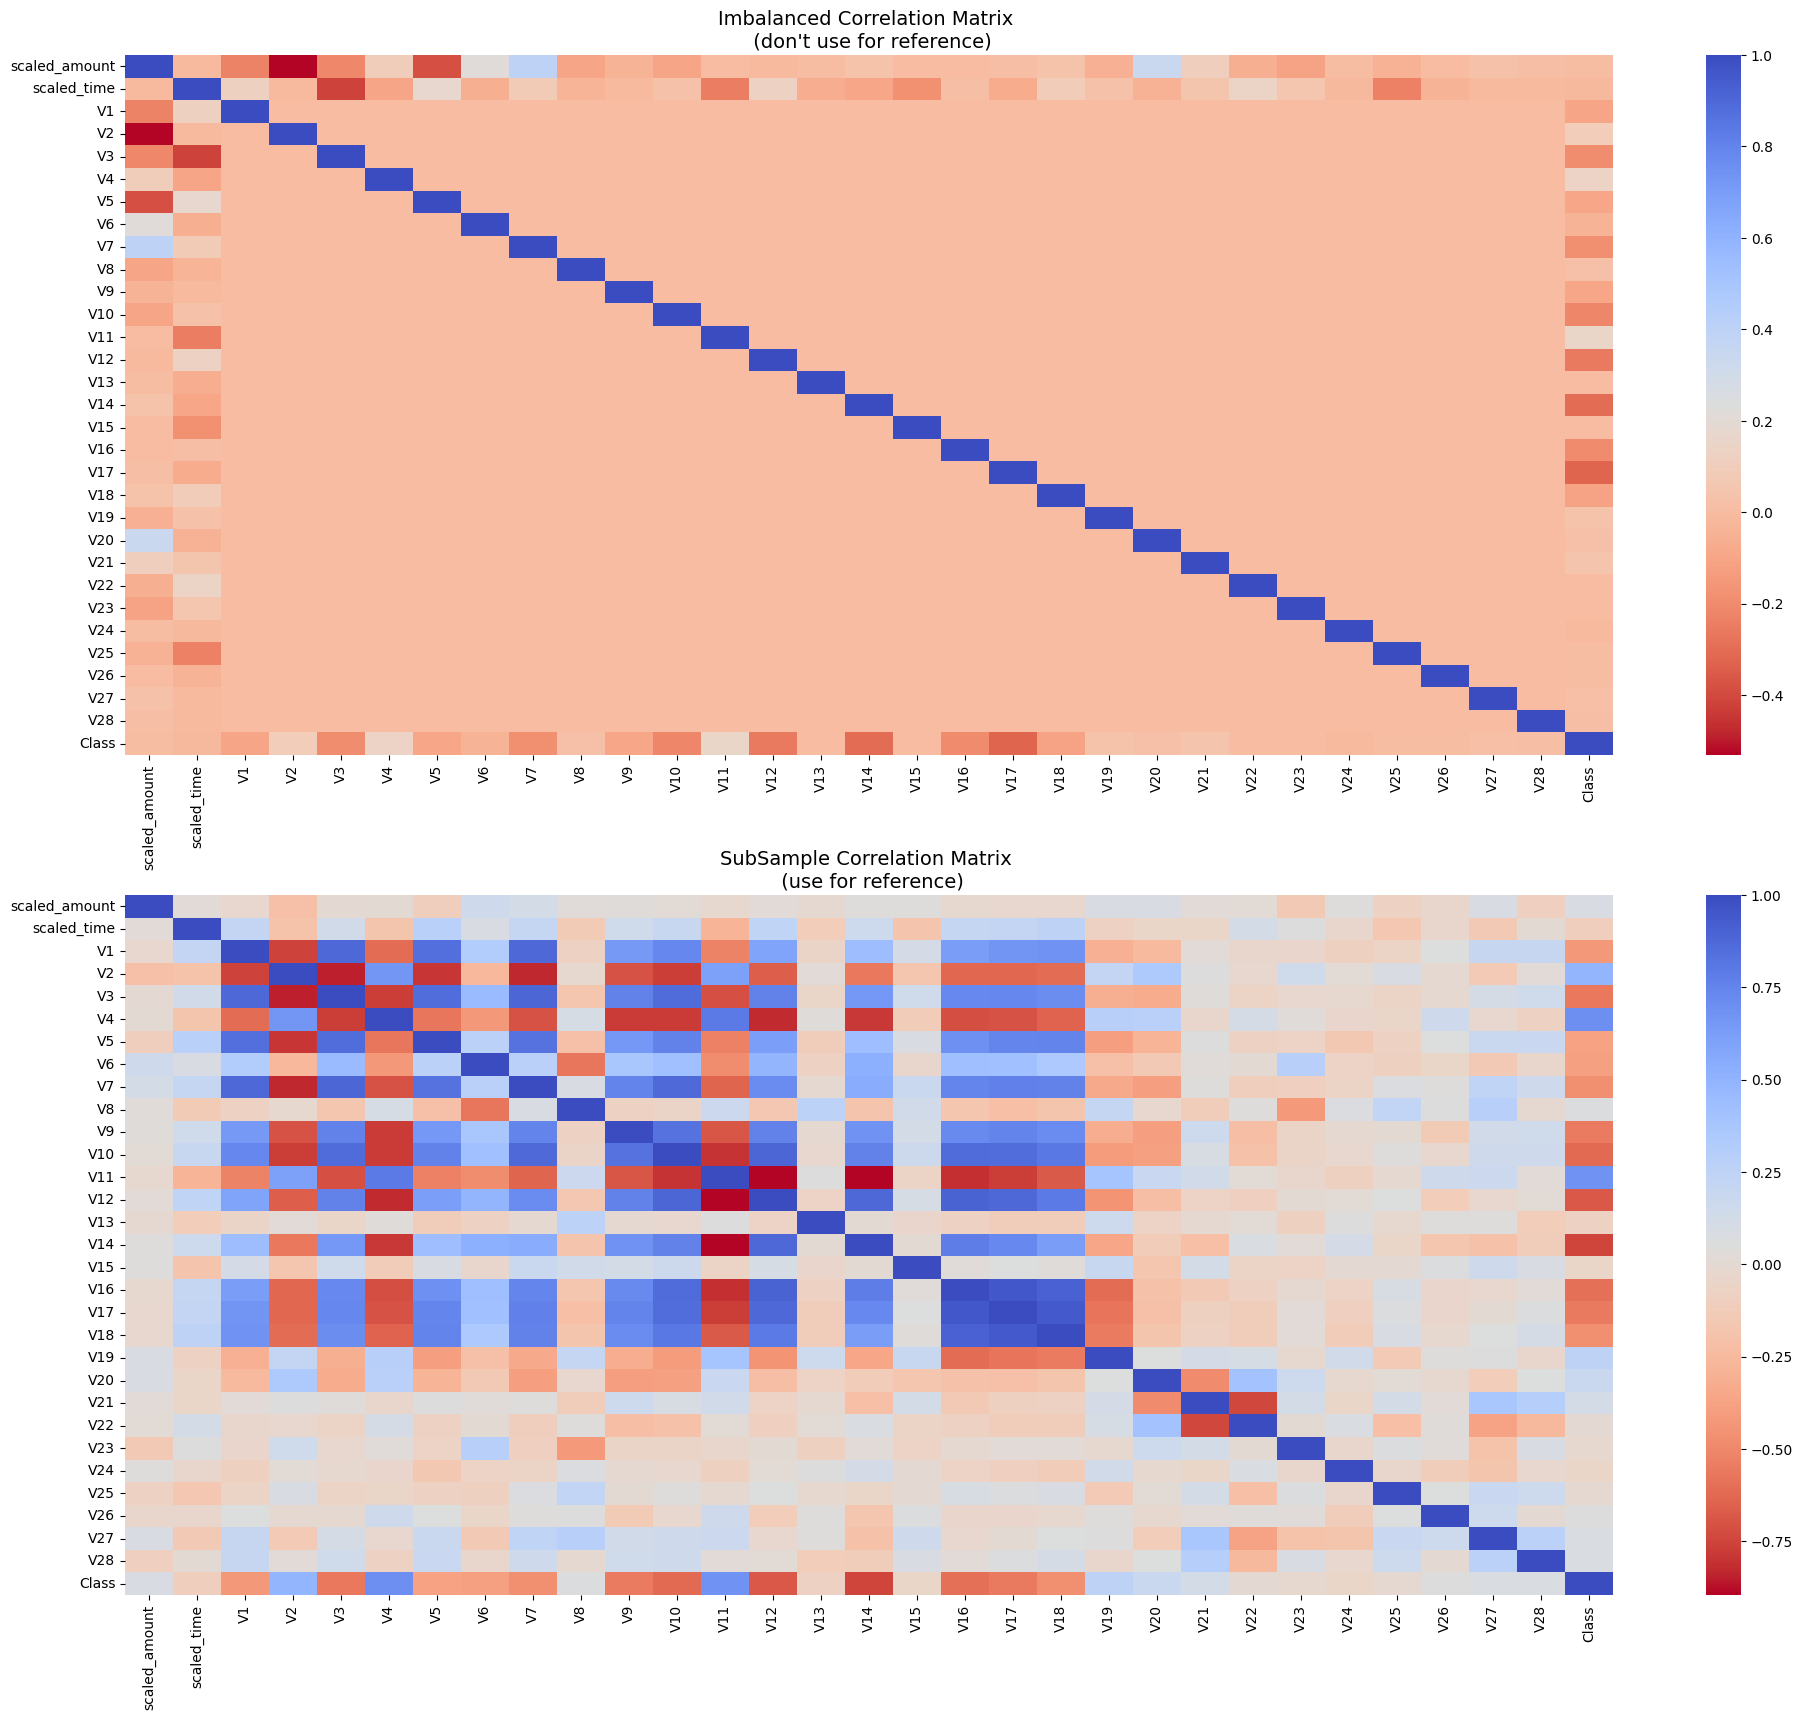

In [7]:
# Amount of fraud classes 492 rows
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

# Display distribution after undersampling
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=new_df, palette='Set2')
plt.title('Equally Distributed Classes', fontsize=14)
plt.savefig('equally_distributed.png')
plt.show()

# Correlation matrices
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

  # Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.savefig('correlation_matrices.png')

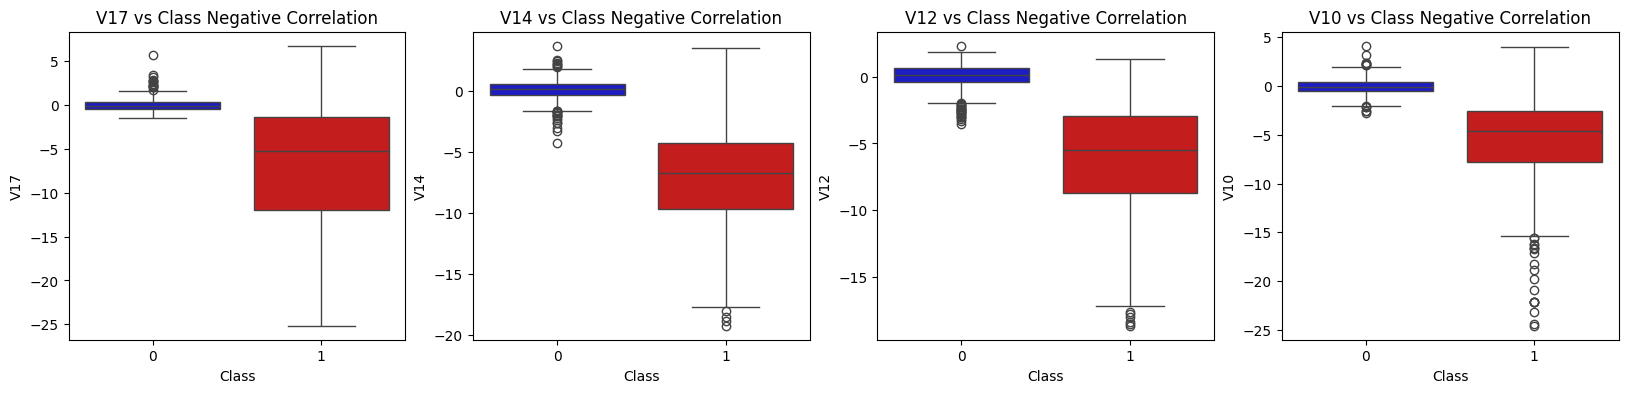

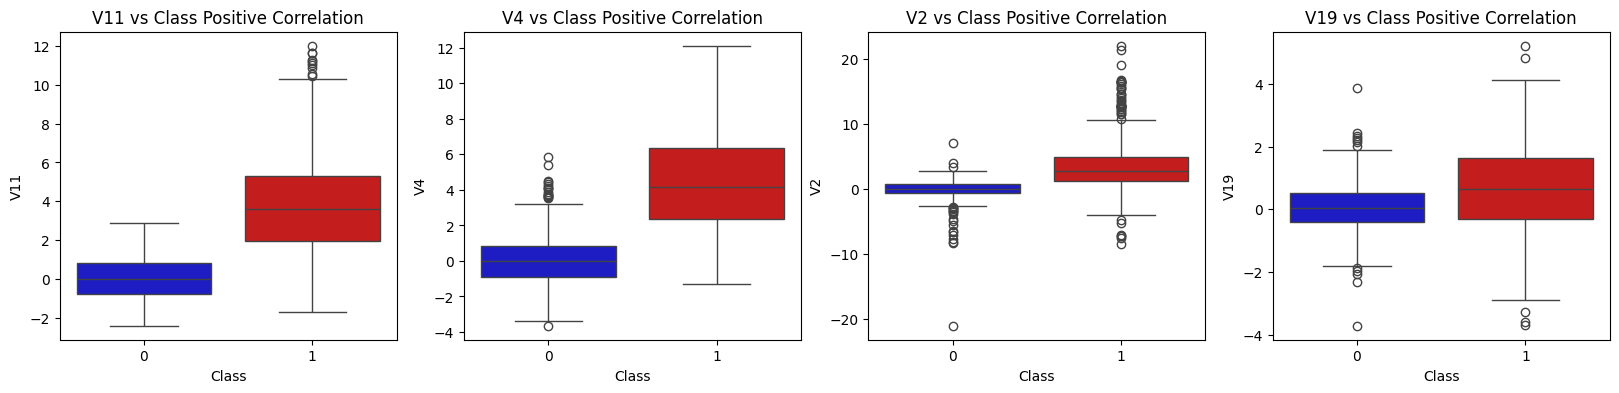

In [8]:
    # Plot boxplots for negative correlations
    f, axes = plt.subplots(ncols=4, figsize=(20, 4))

    sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
    axes[0].set_title('V17 vs Class Negative Correlation')

    sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
    axes[1].set_title('V14 vs Class Negative Correlation')

    sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
    axes[2].set_title('V12 vs Class Negative Correlation')

    sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
    axes[3].set_title('V10 vs Class Negative Correlation')
    plt.savefig('negative_correlations.png')

    # Plot boxplots for positive correlations
    f, axes = plt.subplots(ncols=4, figsize=(20, 4))

    sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
    axes[0].set_title('V11 vs Class Positive Correlation')

    sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
    axes[1].set_title('V4 vs Class Positive Correlation')

    sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
    axes[2].set_title('V2 vs Class Positive Correlation')

    sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
    axes[3].set_title('V19 vs Class Positive Correlation')
    plt.savefig('positive_correlations.png')


Performing anomaly detection...


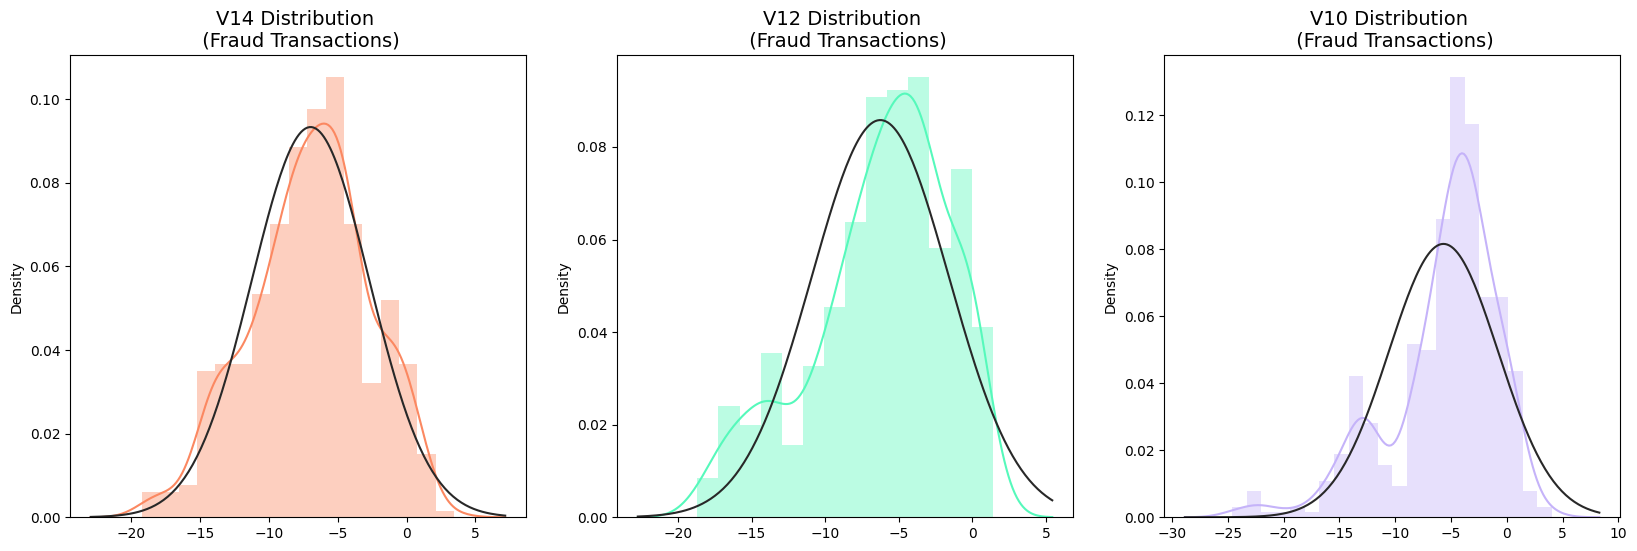

In [9]:
 # Anomaly Detection
print("Performing anomaly detection...")
# Distribution visualization for anomaly detection
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)
plt.savefig('fraud_distributions.png')


In [10]:
 
    # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
    v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    v14_iqr = q75 - q25
    print('iqr: {}'.format(v14_iqr))

    v14_cut_off = v14_iqr * 1.5
    v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
    print('Cut Off: {}'.format(v14_cut_off))
    print('V14 Lower: {}'.format(v14_lower))
    print('V14 Upper: {}'.format(v14_upper))

    outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
    print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
    print('V10 outliers:{}'.format(outliers))

    new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
    print('----' * 44)

    # -----> V12 removing outliers from fraud transactions
    v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
    v12_iqr = q75 - q25

    v12_cut_off = v12_iqr * 1.5
    v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
    print('V12 Lower: {}'.format(v12_lower))
    print('V12 Upper: {}'.format(v12_upper))
    outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
    print('V12 outliers: {}'.format(outliers))
    print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
    new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(new_df)))
    print('----' * 44)

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -18.4937733551053, -18.8220867423816, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.5536970096458, -18.6837146333443, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [11]:
 # Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-24.4031849699728, -15.1241628144947, -18.9132433348732, -22.1870885620007, -16.6496281595399, -23.2282548357516, -18.2711681738888, -16.3035376590131, -15.5637913387301, -20.9491915543611, -16.2556117491401, -14.9246547735487, -15.1237521803455, -22.1870885620007, -17.1415136412892, -14.9246547735487, -15.2399619587112, -19.836148851696, -16.7460441053944, -15.2399619587112, -22.1870885620007, -24.5882624372475, -15.3460988468775, -15.5637913387301, -16.6011969664137, -15.2318333653018, -22.1870885620007]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 949


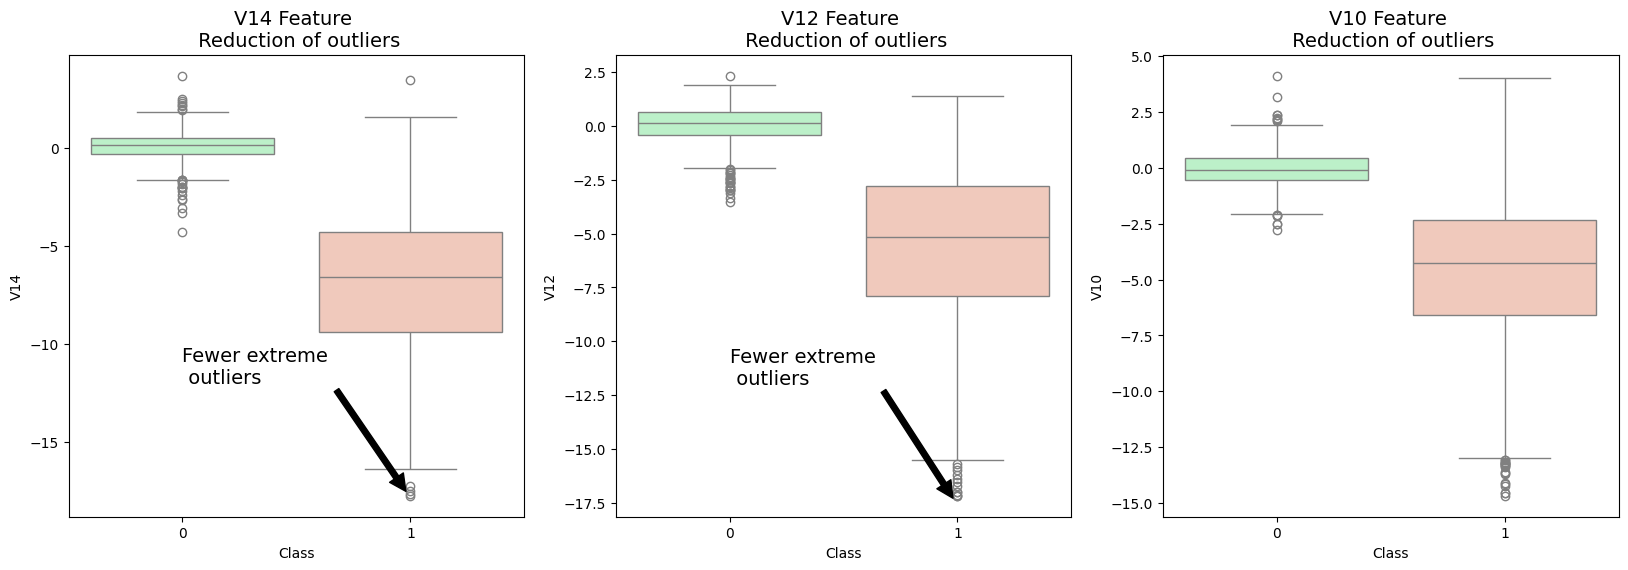

In [12]:
  # Visualizing the reduced outliers
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
colors = ['#B3F9C5', '#f9c5b3']

# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
                arrowprops=dict(facecolor='black'),
                fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
                arrowprops=dict(facecolor='black'),
                fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
                arrowprops=dict(facecolor='black'),
                fontsize=14)
plt.savefig('reduced_outliers.png')

In [13]:
# Dimensionality Reduction and Clustering
print("Performing dimensionality reduction and clustering...")
# Extract features and labels from the balanced dataset
X = new_df.drop('Class', axis=1)
y = new_df['Class']


Performing dimensionality reduction and clustering...


In [14]:
 # t-SNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))


T-SNE took 1.7e+01 s


In [15]:
  # PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.0055 s


In [16]:
    # TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

Truncated SVD took 0.14 s


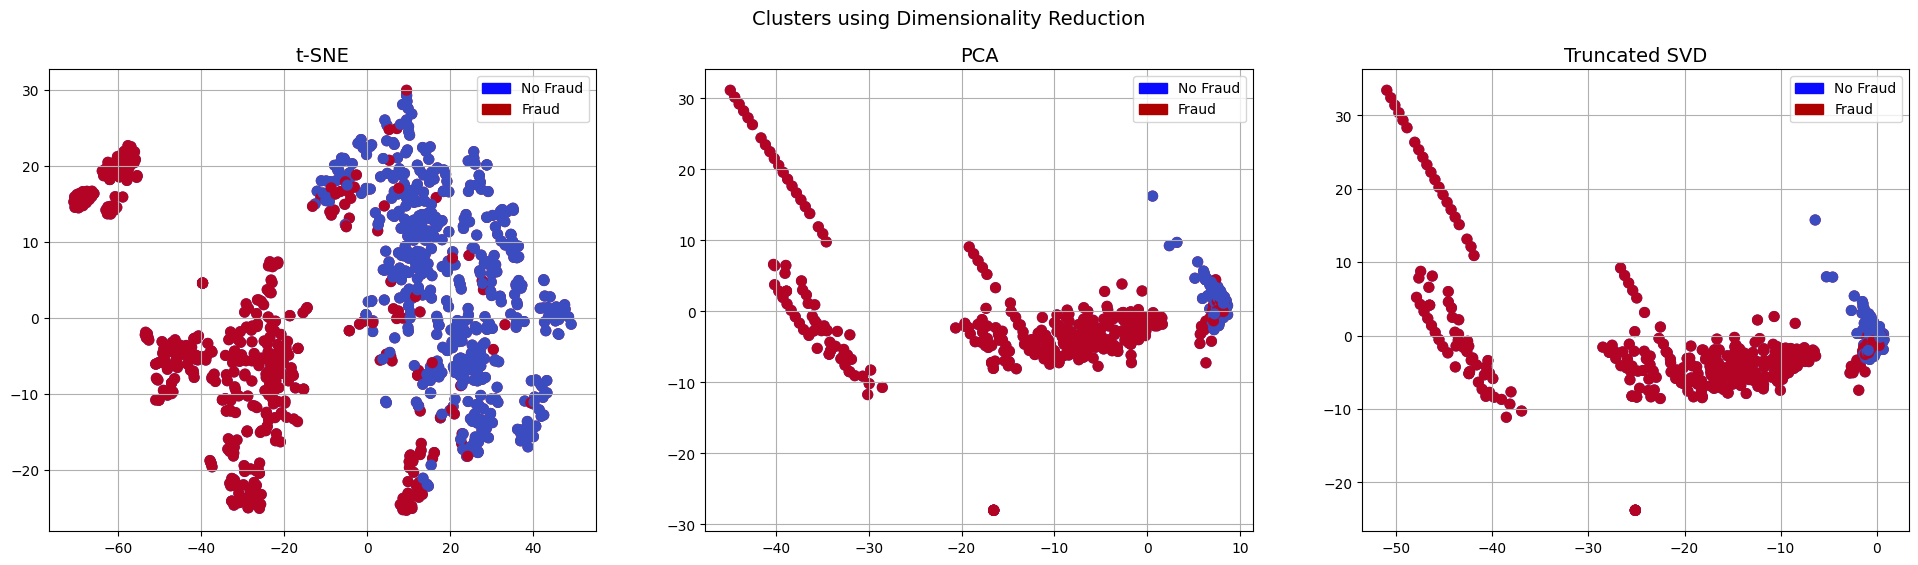

In [17]:
# Visualizing the clusters
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.savefig('dimensionality_reduction.png')


In [18]:
 # Training with classifiers using undersampled data
print("Training classifiers with undersampled data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Training classifiers with undersampled data...


In [19]:
# Define classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Training and cross-validation with simple classifiers
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [20]:
# Use GridSearchCV to find the best parameters
# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Handle newer scikit-learn versions where l1 penalty requires solver='liblinear'
try:
    grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
except:
    grid_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)

grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

In [21]:
 # DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
                  "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


In [22]:
 # Cross-validation scores
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  93.28%
Knears Neighbors Cross Validation Score 92.62%
Support Vector Classifier Cross Validation Score 93.28%
DecisionTree Classifier Cross Validation Score 91.57%


In [23]:
 # Undersampling with cross-validation (correct approach)
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", len(train_index), "Test:", len(test_index))
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    break

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Train: 227845 Test: 56962


In [24]:
# Implementing NearMiss Technique
# Distribution of NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))


NearMiss Label Distribution: Counter({0: 492, 1: 492})


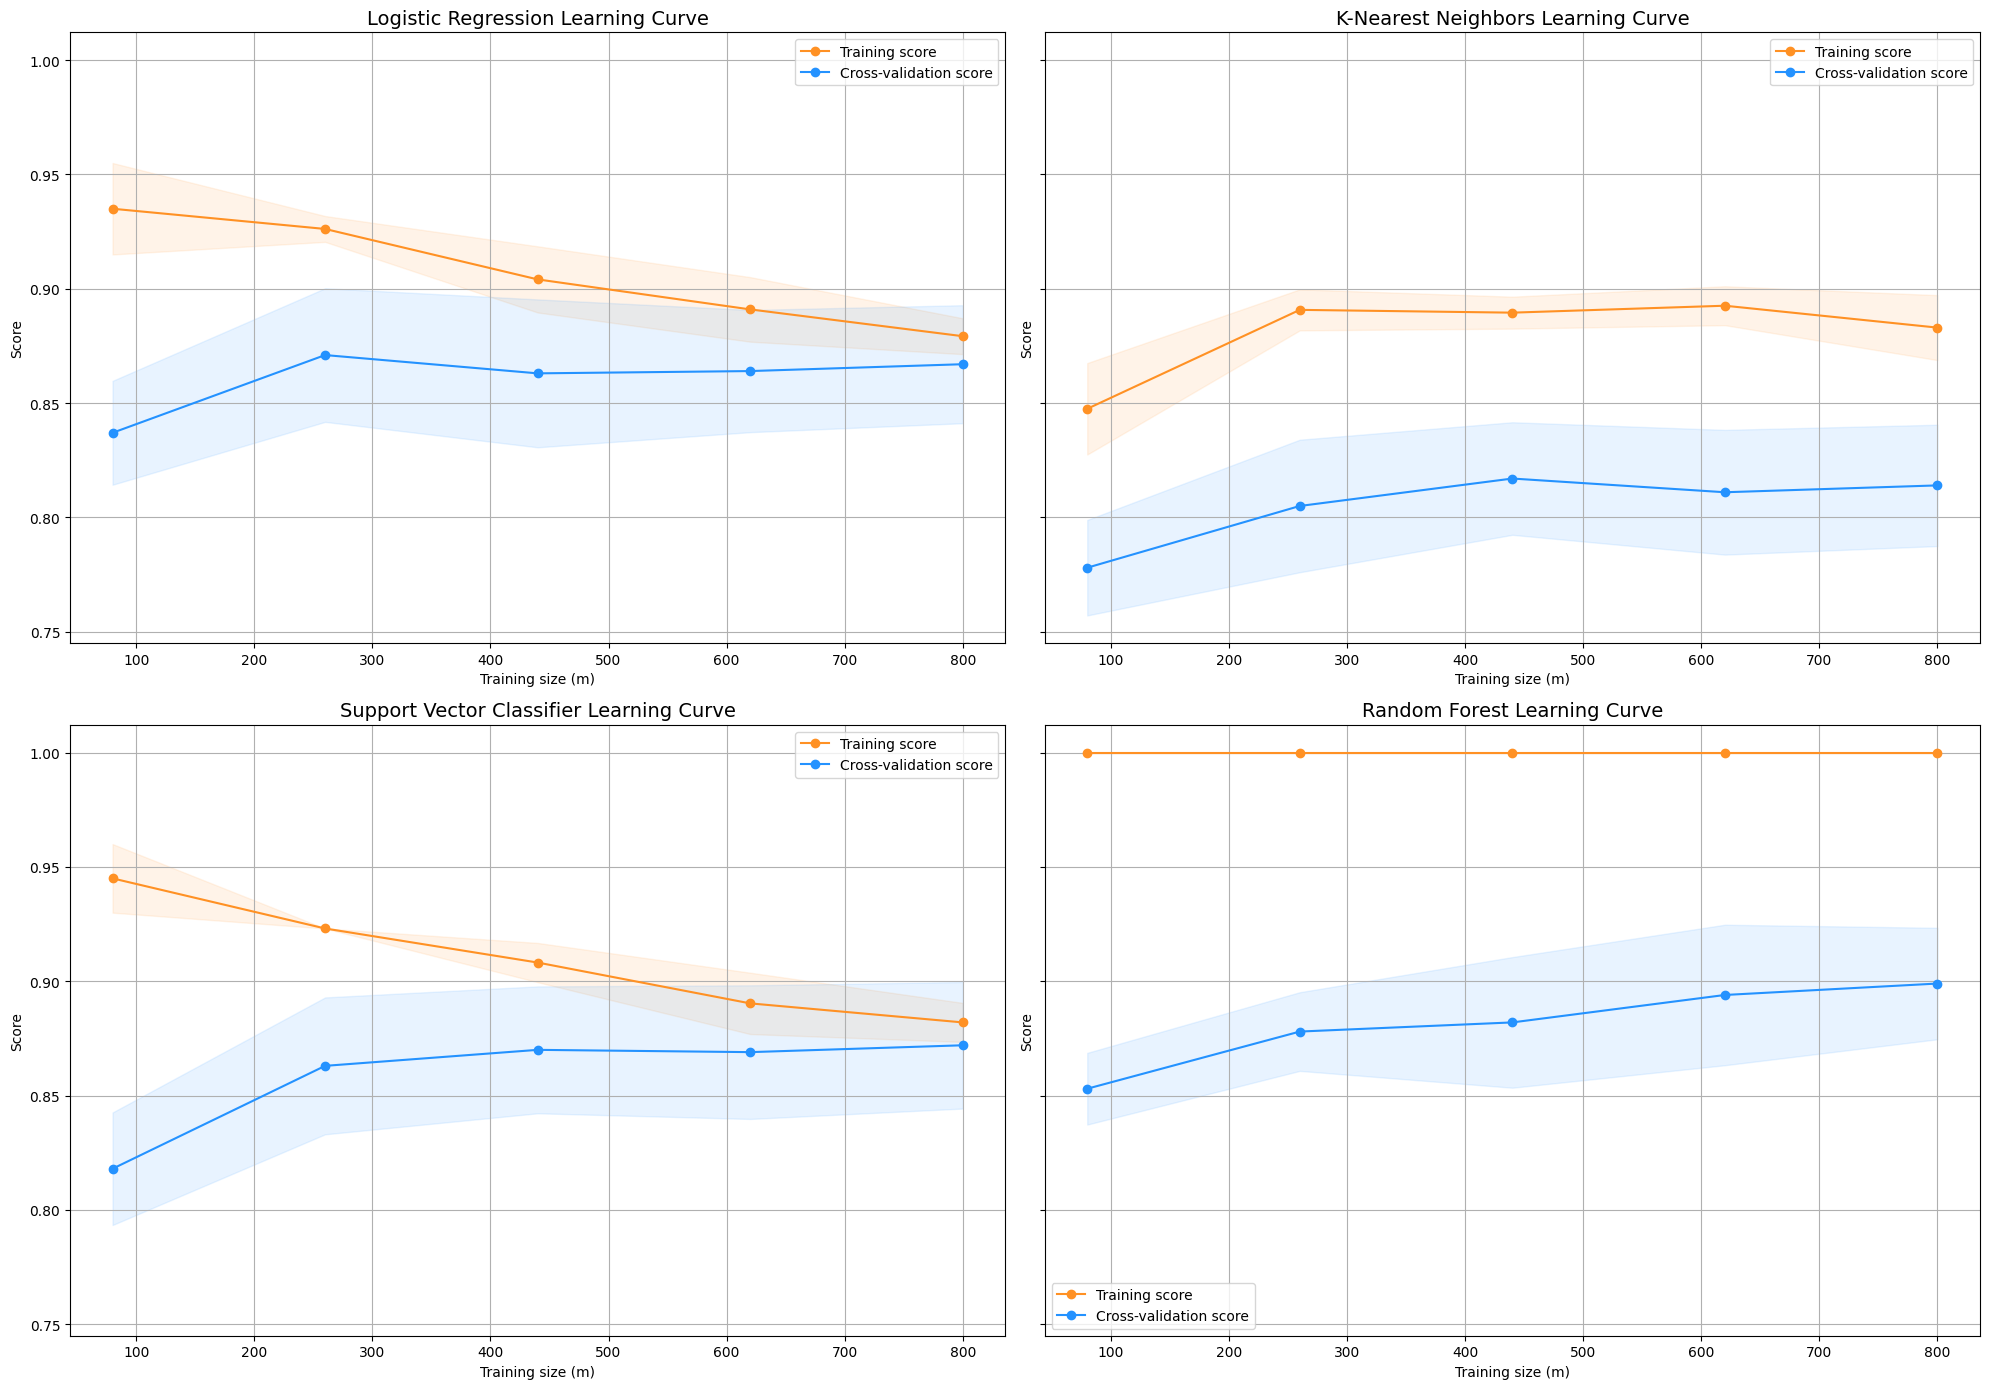

In [25]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Define all estimators correctly
estimator1 = LogisticRegression(max_iter=1000)
estimator2 = KNeighborsClassifier(n_neighbors=5)
estimator3 = SVC(kernel='linear', C=1)
estimator4 = RandomForestClassifier(n_estimators=100, random_state=42)

# Plot Learning Curves
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14), sharey=True)

    if ylim is not None:
        plt.ylim(*ylim)

    # === First Estimator (Logistic Regression) ===
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # === Second Estimator (K-Nearest Neighbors) ===
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("K-Nearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # === Third Estimator (Support Vector Classifier) ===
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # === Fourth Estimator (Random Forest) ===
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    plt.tight_layout()
    plt.show()


# Call the function with correct parameters
plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, cv=5, n_jobs=-1)

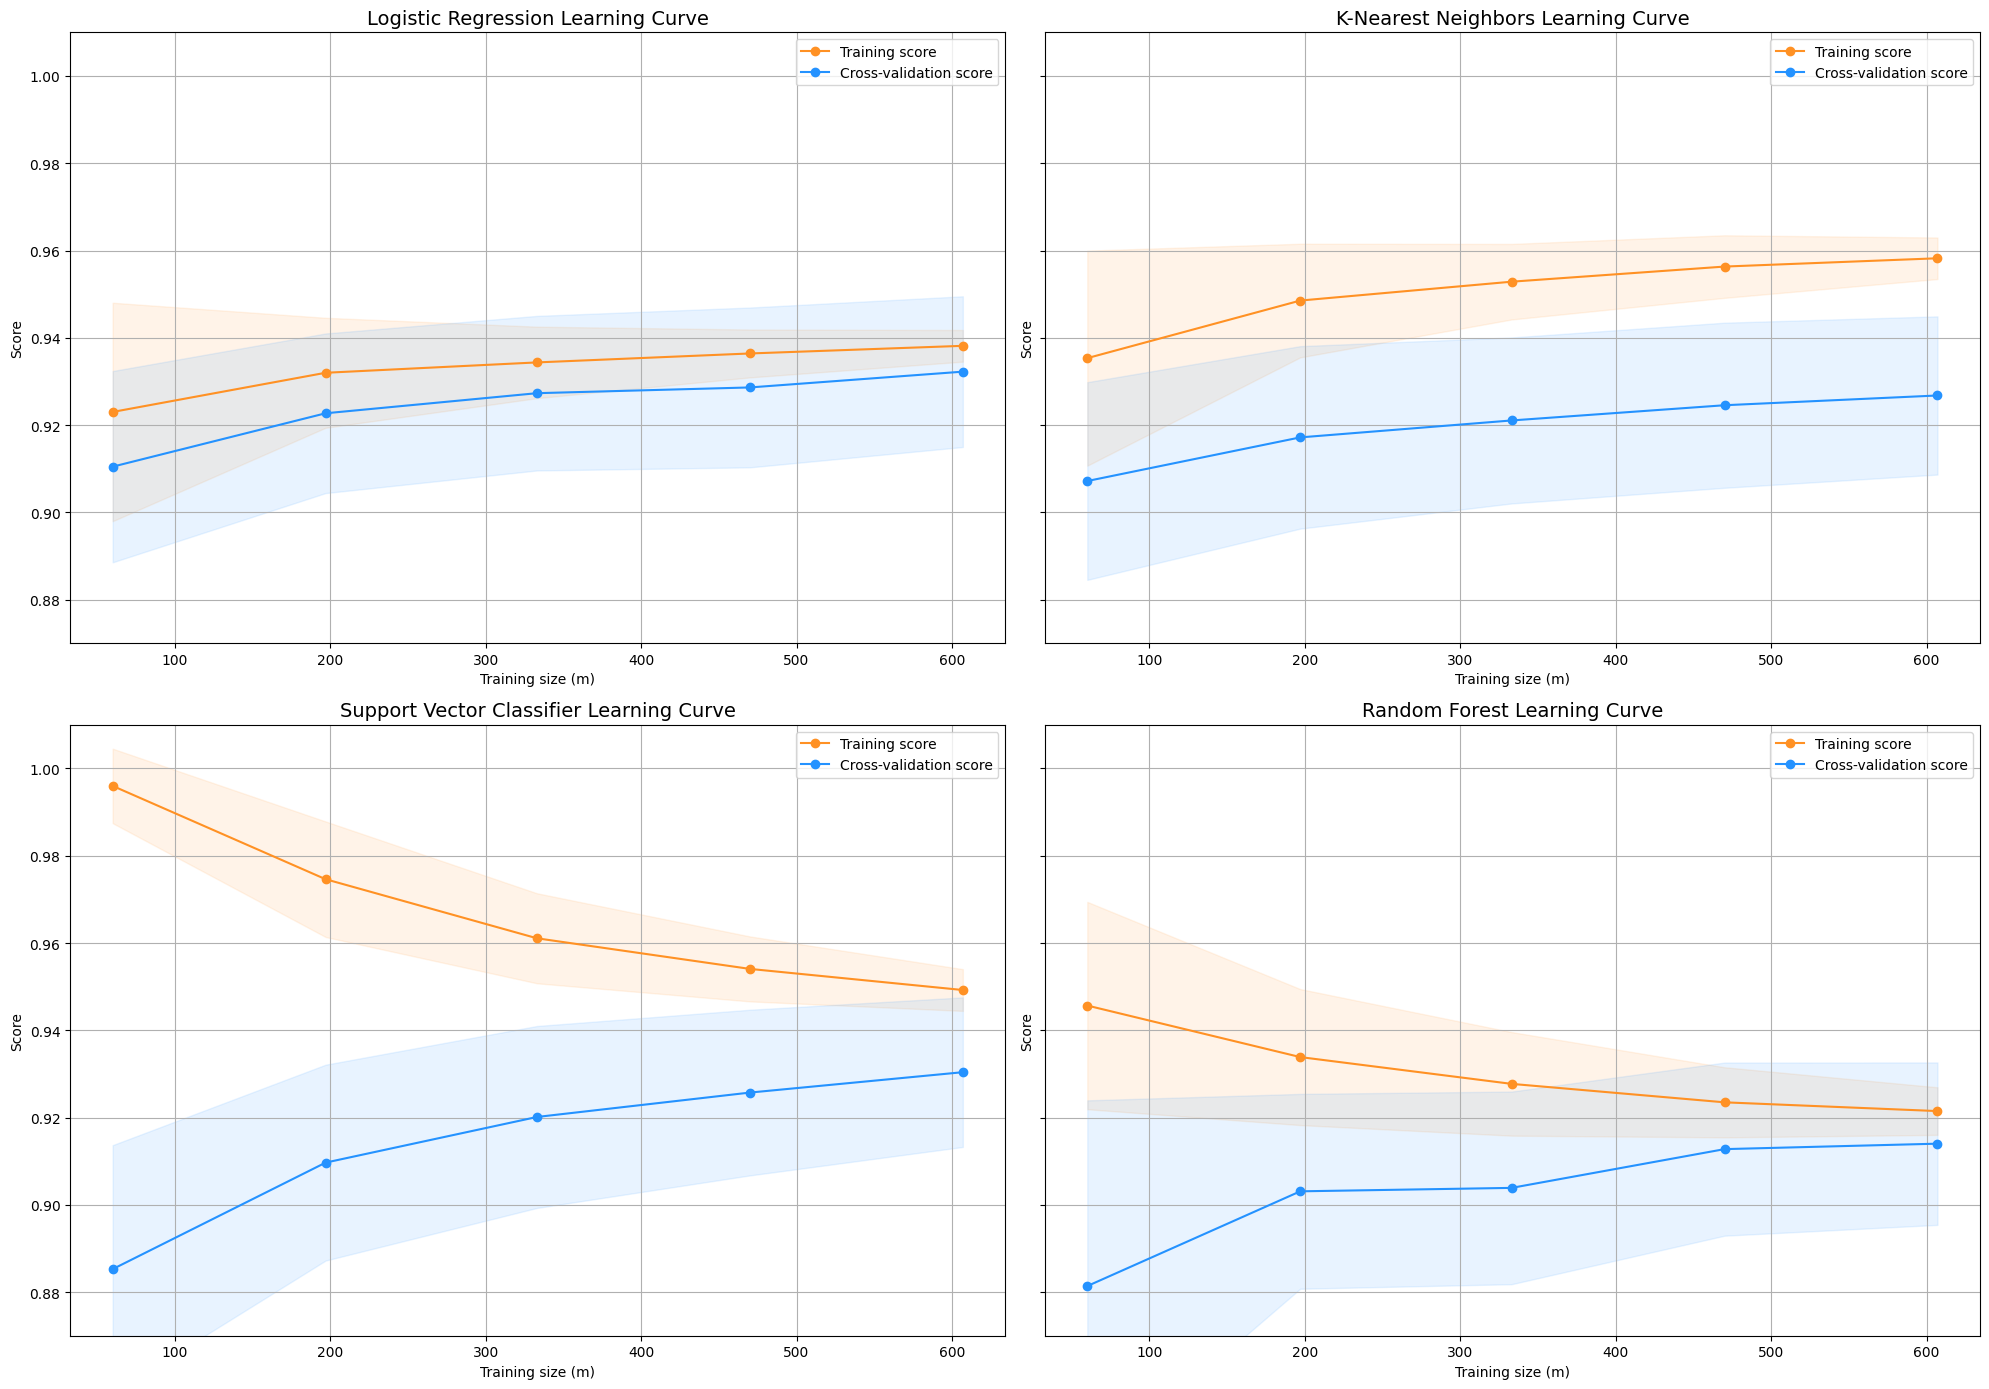

Logistic Regression:  0.9781698855657059
KNears Neighbors:  0.9241542568723147
Support Vector Classifier:  0.9726497865654417
Decision Tree Classifier:  0.9132252951236809


<Figure size 640x480 with 0 Axes>

In [26]:
 # Plot learning curves
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.savefig('learning_curves.png')

# Get cross-validation predictions for ROC curve analysis
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

# Print ROC AUC scores
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))


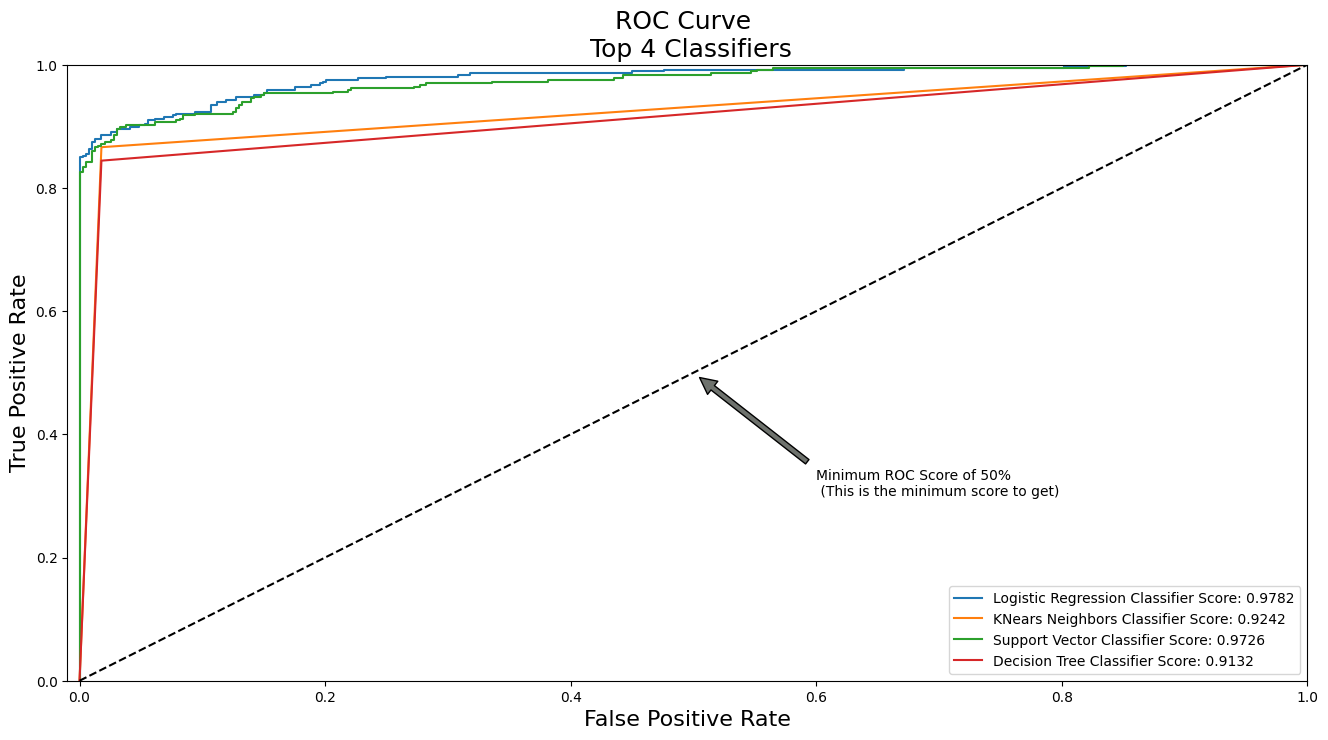

In [27]:
# Calculate ROC curves
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

# Plot ROC curves
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                    arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                    )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.savefig('roc_curves.png')


A deeper look into Logistic Regression:


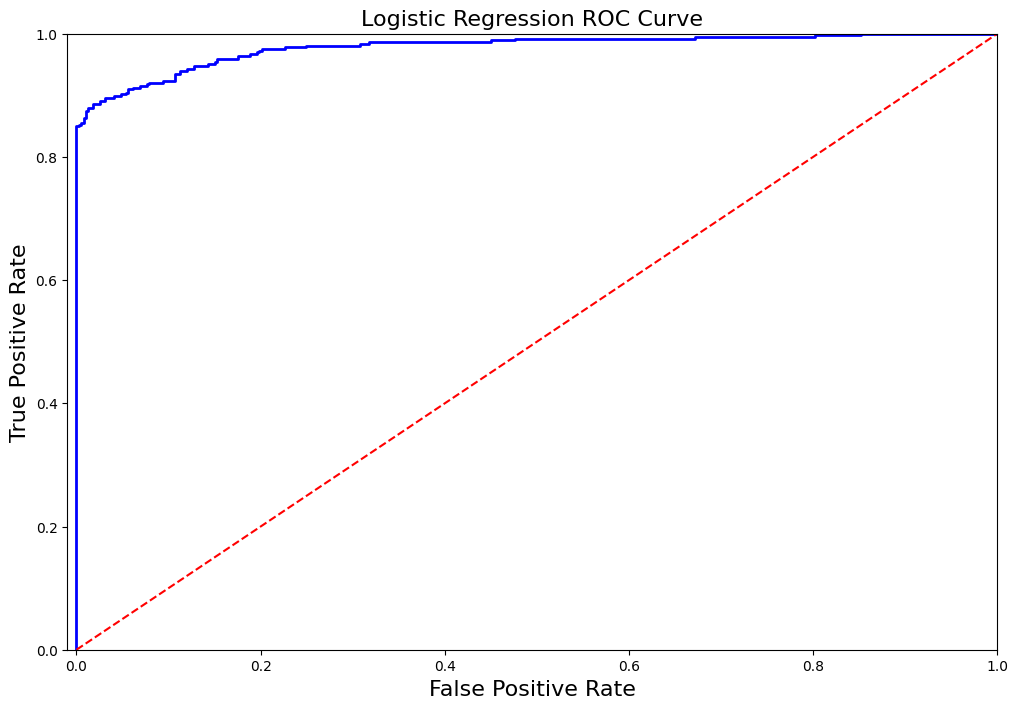

In [28]:
# Deeper look into Logistic Regression
print("\nA deeper look into Logistic Regression:")
# Plot Logistic Regression ROC curve
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])

logistic_roc_curve(log_fpr, log_tpr)
plt.savefig('logistic_roc.png')

# Calculate precision and recall for various thresholds
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

# Calculate evaluation metrics for log_reg model
y_pred = log_reg.predict(X_train)

In [29]:
 # Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.86
Precision Score: 0.94
F1 Score: 0.90
Accuracy Score: 0.91
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.95
Precision Score: 0.00
Recall Score: 0.06
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


Average precision-recall score: 0.13


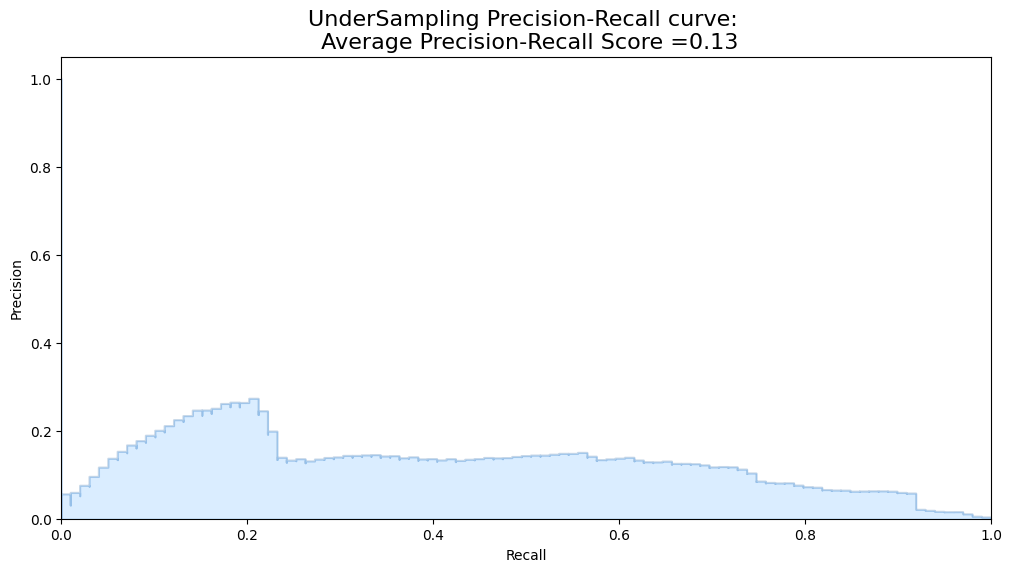

In [30]:
# Calculate decision function for test set
undersample_y_score = log_reg.decision_function(original_Xtest)

# Calculate average precision-recall score
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)
print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

# Plot precision-recall curve for undersampling
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)
plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
              undersample_average_precision), fontsize=16)
plt.savefig('undersample_precision_recall.png')


In [31]:
# SMOTE Technique (Over-Sampling)
print("\nImplementing SMOTE (Over-Sampling)...")
# Length check
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# Lists to append the performance metrics
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
log_reg_sm = LogisticRegression()

# Randomized search for parameters
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


Implementing SMOTE (Over-Sampling)...
Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962


In [32]:
 # Implementing SMOTE Technique with cross-validation
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9261296056529659
precision: 0.08032001914338631
recall: 0.9031807854592664
f1: 0.1355206003541462
---------------------------------------------------------------------------------------------------------------------------------------


In [33]:
 # Classification report for SMOTE prediction
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

# Decision function for ROC curve
y_score = best_est.decision_function(original_Xtest)

# Calculate average precision
average_precision = average_precision_score(original_ytest, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


              precision    recall  f1-score   support

    No Fraud       1.00      0.86      0.93     56863
       Fraud       0.01      0.84      0.02        99

    accuracy                           0.86     56962
   macro avg       0.51      0.85      0.47     56962
weighted avg       1.00      0.86      0.92     56962

Average precision-recall score: 0.53


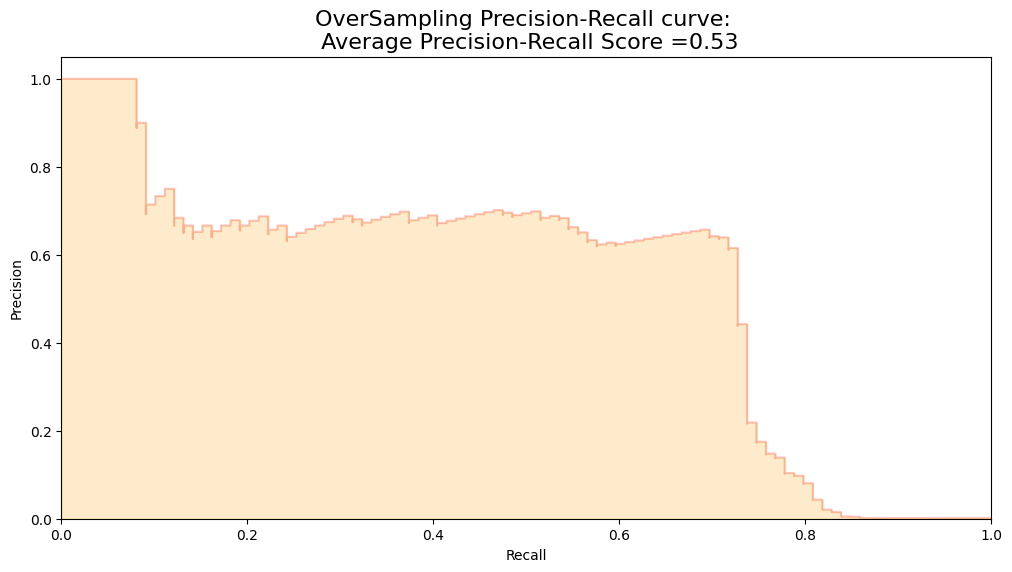

In [34]:
 # Plot Precision-Recall curve for oversampling
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(original_ytest, y_score)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
              average_precision), fontsize=16)
plt.savefig('oversample_precision_recall.png')

# SMOTE Technique after splitting
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the original training data
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)


In [35]:
# Train Logistic Regression on the oversampled data
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

# Testing with Logistic Regression
print("\nTesting with Logistic Regression:")

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


Fitting oversample data took :2.830585241317749 sec

Testing with Logistic Regression:


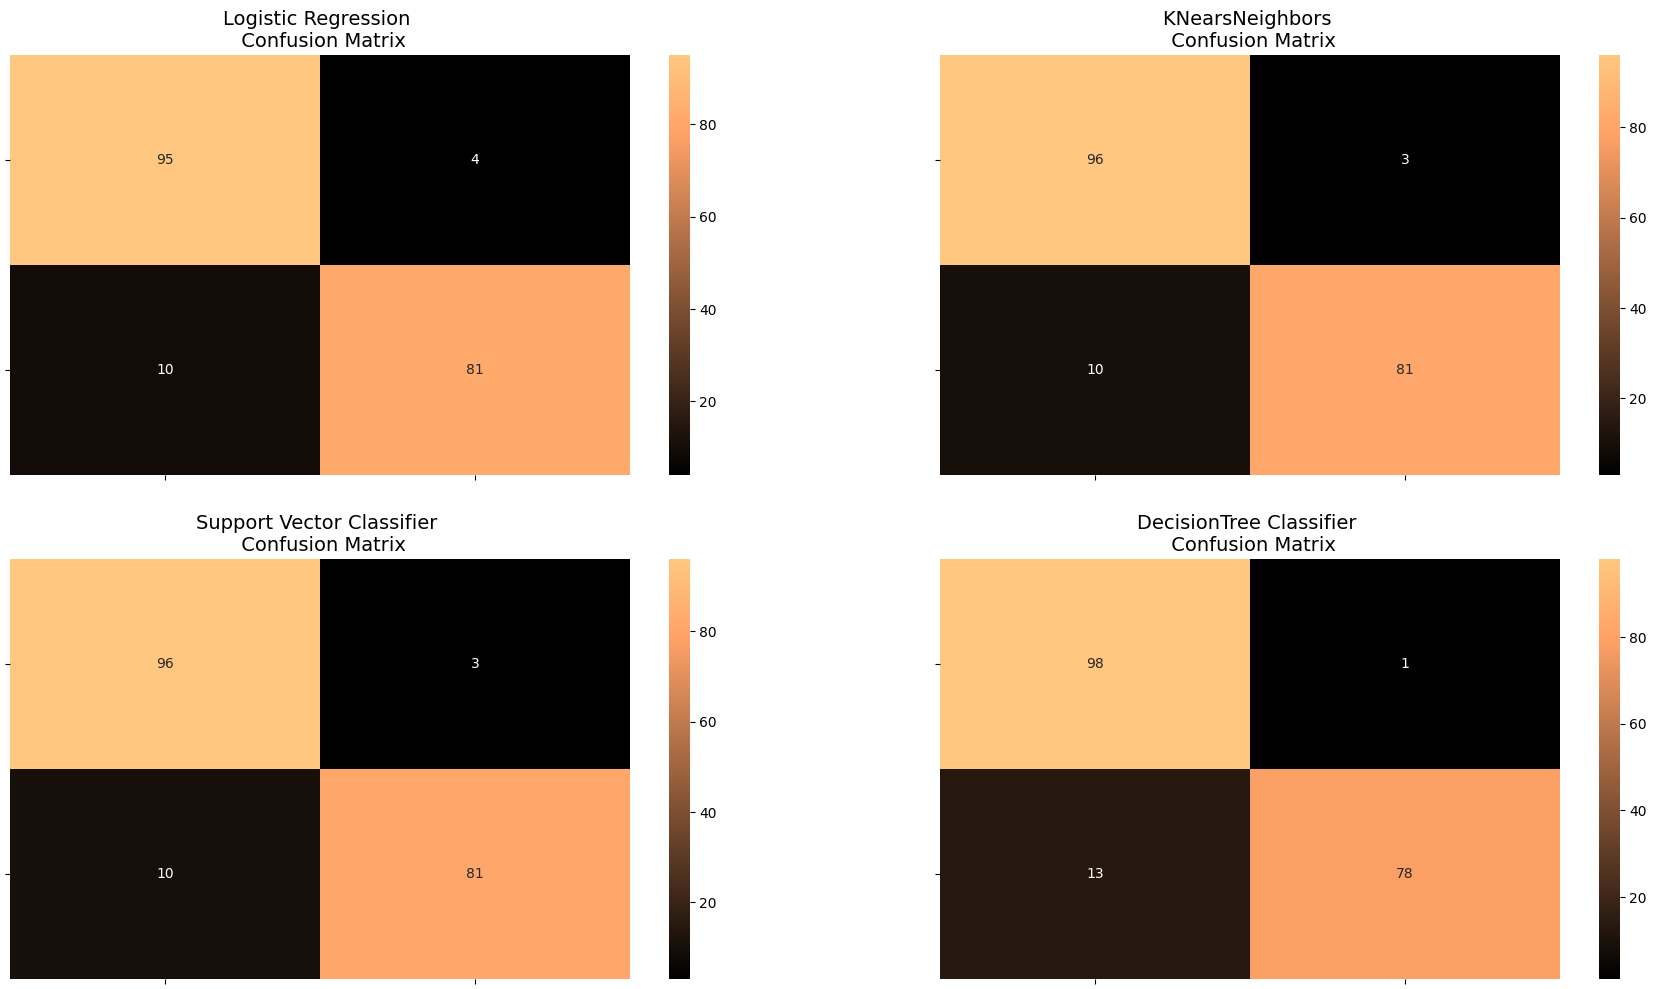

In [36]:
# Calculate confusion matrices
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrices
fig, ax = plt.subplots(2, 2, figsize=(22, 12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)
plt.savefig('confusion_matrices.png')


In [37]:
# Print classification reports
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

# Compare undersampling vs oversampling
# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.95      0.89      0.92        91

    accuracy                           0.93       190
   macro avg       0.93      0.92      0.93       190
weighted avg       0.93      0.93      0.93       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.96      0.89      0.93        91

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.96      0.89      0.93        91

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted

In [38]:
# Create a dataframe with the results
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

print("Final comparison of techniques:")
print(final_df)

# Neural Networks Testing (undersampling vs oversampling)
print("\nNeural Networks Testing (undersampling vs oversampling):")

# Define the undersampling neural network model
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Final comparison of techniques:
              Technique     Score
0  Random UnderSampling  0.926316
1  Oversampling (SMOTE)  0.862628

Neural Networks Testing (undersampling vs oversampling):


In [39]:
# Print the model summary
undersample_model.summary()

# Compile the model
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

# Make predictions
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = np.argmax(undersample_predictions, axis=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 - 3s - 112ms/step - accuracy: 0.6063 - loss: 0.6713 - val_accuracy: 0.7105 - val_loss: 0.4785
Epoch 2/20
25/25 - 0s - 12ms/step - accuracy: 0.8122 - loss: 0.3735 - val_accuracy: 0.8618 - val_loss: 0.3343
Epoch 3/20
25/25 - 1s - 27ms/step - accuracy: 0.9143 - loss: 0.2721 - val_accuracy: 0.8750 - val_loss: 0.2719
Epoch 4/20
25/25 - 0s - 13ms/step - accuracy: 0.9308 - loss: 0.2114 - val_accuracy: 0.9079 - val_loss: 0.2390
Epoch 5/20
25/25 - 0s - 12ms/step - accuracy: 0.9374 - loss: 0.1734 - val_accuracy: 0.9145 - val_loss: 0.2264
Epoch 6/20
25/25 - 0s - 14ms/step - accuracy: 0.9456 - loss: 0.1491 - val_accuracy: 0.9145 - val_loss: 0.2196
Epoch 7/20
25/25 - 0s - 12ms/step - accuracy: 0.9506 - loss: 0.1321 - val_accuracy: 0.9145 - val_loss: 0.2183
Epoch 8/20
25/25 - 0s - 12ms/step - accuracy: 0.9506 - loss: 0.1198 - val_accuracy: 0.9145 - val_loss: 0.2161
Epoch 9/20
25/25 - 0s - 13ms/step - accuracy: 0.9555 - loss: 0.1097 - val_accuracy: 0.9079 - val_loss: 0.2205
Epoch 10/

In [40]:
# Define confusion matrix plotting function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54563  2300]
 [    1    98]]
Confusion matrix, without normalization
[[56863     0]
 [    0    99]]


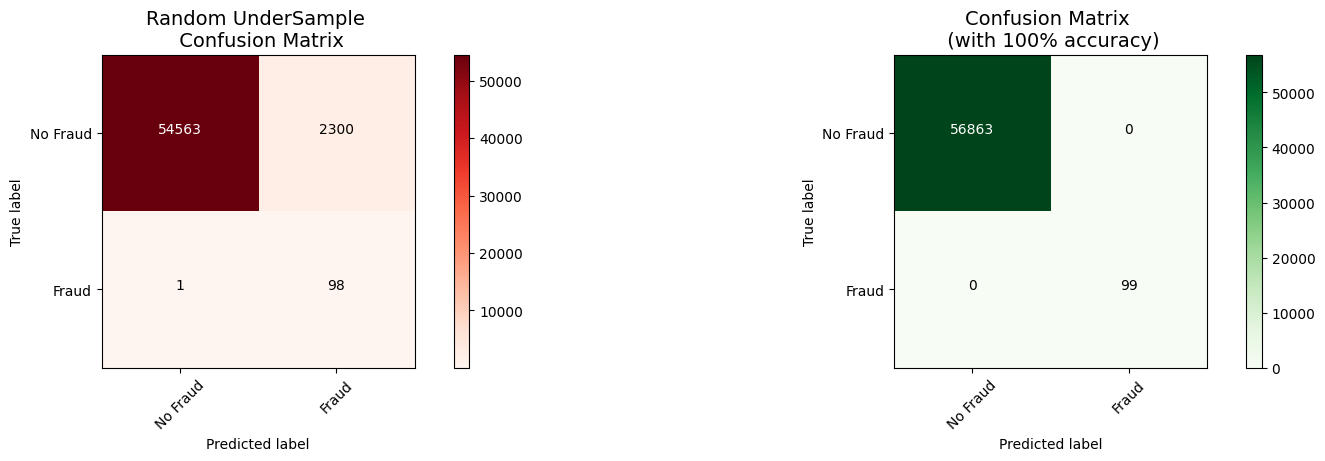

In [41]:
# Plot confusion matrices for undersample model
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16, 8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)
plt.savefig('undersample_confusion_matrix.png')

# Define the oversampling neural network model
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [42]:
# Compile the model
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

# Make predictions
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = np.argmax(oversample_predictions, axis=1)

Epoch 1/20
1214/1214 - 7s - 5ms/step - accuracy: 0.9699 - loss: 0.0843 - val_accuracy: 0.9919 - val_loss: 0.0359
Epoch 2/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9954 - loss: 0.0178 - val_accuracy: 0.9987 - val_loss: 0.0109
Epoch 3/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9979 - loss: 0.0090 - val_accuracy: 0.9996 - val_loss: 0.0061
Epoch 4/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9961 - val_loss: 0.0130
Epoch 5/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9999 - val_loss: 0.0021
Epoch 7/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 9.2288e-04
Epoch 9/20
1214/1214 - 4s - 3ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 1.000

Confusion matrix, without normalization
[[56618   245]
 [   25    74]]
Confusion matrix, without normalization
[[56863     0]
 [    0    99]]
Analysis completed. All figures saved to disk.
Loading data from 'Downloads/creditcard.csv/creditcard.csv'...
File loaded successfully!


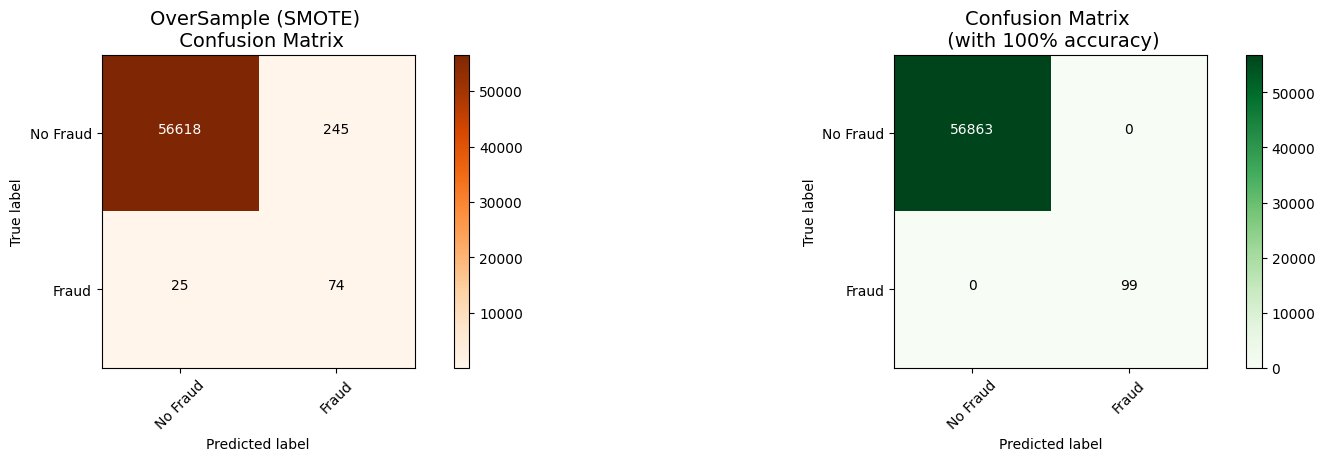

In [43]:
# Plot confusion matrices for oversample model
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16, 8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)
plt.savefig('oversample_confusion_matrix.png')

print("Analysis completed. All figures saved to disk.")


if __name__ == "__main__":
 main()